In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

import re
import os

In [2]:
df = pd.read_csv("customer_churn.csv")
df.head(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [3]:
df.groupby('Contract')[['Tenure Months','Total Charges']].agg(['mean','min','max'])

Tenure Months        
                        mean min max
Contract                            
Month-to-month     18.036645   1  72
One year           42.044807   0  72
Two year           56.735103   0  72

In [4]:
df.tail(5)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


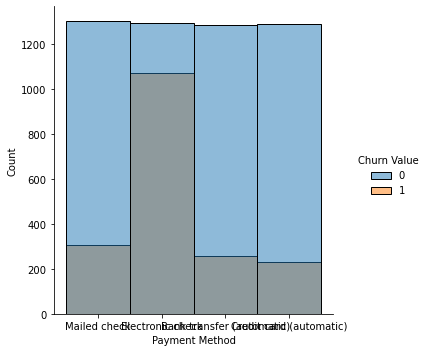

In [5]:
sns.displot(data=df, x="Payment Method", hue="Churn Value")

In [6]:
def null_vals(dataframe):
    '''function to show both number of nulls and the percentage of nulls in the whole column'''
    null_vals = dataframe.isnull().sum()
    total_cnt = len(dataframe)
    null_vals = pd.DataFrame(null_vals,columns=['null'])
    null_vals['percent'] = round((null_vals['null']/total_cnt)*100,3)
    return null_vals.sort_values('percent', ascending=False)
null_vals(df)

,null,percent
Churn Reason,5174,73.463
Internet Service,0,0.000
Churn Value,0,0.000
Churn Label,0,0.000
Total Charges,0,0.000
Monthly Charges,0,0.000
Payment Method,0,0.000
Paperless Billing,0,0.000
Contract,0,0.000
Streaming Movies,0,0.000


In [7]:
len(df)

7043

In [8]:
churned = df['Churn Value'].sum()
print (churned)

1869


In [9]:
not_churned =len(df) - churned
print (not_churned)

5174


In [10]:
for col in df:
    print(df[col].unique())

['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
[1]
['United States']
['California']
['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
[90003 90005 90006 ... 96128 96134 96146]
['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72
  0]
['Yes' 'No']
['No' 'Yes' 'No phone service']
['DSL' 'Fiber optic' 'No']
['Yes' 'No' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No i

In [11]:
## 'Gender'	'Senior Citizen'	'Partner'	'Dependents' 'Phone Service' 'Paperless Billing'
def feature_eng(df):
        df = pd.get_dummies(df, columns = ['Gender'], drop_first = True, prefix = 'Gender')
        df = pd.get_dummies(df, columns = ['Senior Citizen'], drop_first = True, prefix = 'Senior Citizen')
        df = pd.get_dummies(df, columns = ['Partner'], drop_first = True, prefix = 'Partner')
        df = pd.get_dummies(df, columns = ['Dependents'], drop_first = True, prefix = 'Dependents')
        df = pd.get_dummies(df, columns = ['Phone Service'], drop_first = True, prefix = 'Phone Service')
        df = pd.get_dummies(df, columns = ['Paperless Billing'], drop_first = True, prefix = 'Paperless Billing')
        df = sm.add_constant(df)
        return df

In [12]:
feature_eng(df)

C:\Users\amirt\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Tenure Months,...,Total Charges,Churn Label,Churn Value,Churn Reason,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Phone Service_Yes,Paperless Billing_Yes
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,2,...,108.15,Yes,1,Competitor made better offer,1,0,0,0,1,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,2,...,151.65,Yes,1,Moved,0,0,0,1,1,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,8,...,820.5,Yes,1,Moved,0,0,0,1,1,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,28,...,3046.05,Yes,1,Moved,0,0,1,1,1,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,49,...,5036.3,Yes,1,Competitor had better devices,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,72,...,1419.4,No,0,NaN,0,0,0,0,1,1
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,24,...,1990.5,No,0,NaN,1,0,1,1,1,1
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,72,...,7362.9,No,0,NaN,0,0,1,1,1,1
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,11,...,346.45,No,0,NaN,0,0,1,1,0,1


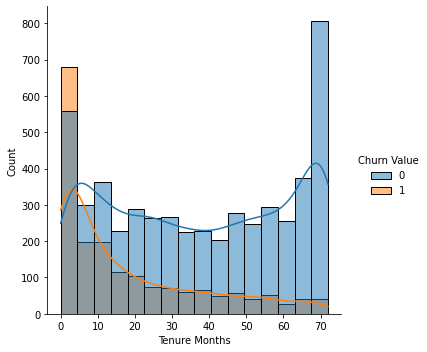

In [13]:
## Comparing Tenure Months to whether a customer has churned or not
## Results show that a lot of customers churn early, around <5 months, and a lot of customers who are loyal, >70 months, do not churn


sns.displot(data=df, x="Tenure Months", kde=True, hue="Churn Value")

<AxesSubplot:xlabel='Churn Value', ylabel='Monthly Charges'>

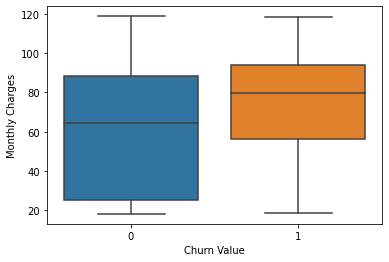

In [14]:
## Comparing monthly charges to whether a customer has churned or not
##

sns.boxplot(x="Churn Value", y="Monthly Charges", data=df)

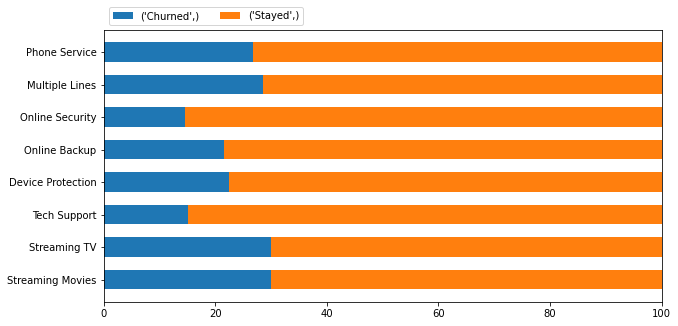

In [15]:
category_names = ['Churned', 'Stayed']
results = {
    'Phone Service': [26.71, 73.29],
    'Multiple Lines': [28.61, 71.39],
    'Online Security': [14.61, 85.39],
    'Online Backup': [21.53, 78.47],
    'Device Protection': [22.5, 77.5],
    'Tech Support': [15.17, 84.83],
    'Streaming TV': [30.07, 69.93],
    'Streaming Movies': [29.94, 70.06]
}


def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname) in enumerate(zip(category_names)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.6,
                        label=colname)

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')
#best, upper right, upper left, lower left, lower right, right, center left, center right, lower center, upper center, center
    return fig, ax

survey(results, category_names)
plt.show()

In [16]:
products = df[['Phone Service', 'Multiple Lines', 'Online Security',
             'Online Backup', 'Device Protection', 'Tech Support',
             'Streaming TV', 'Streaming Movies']]

products = products.replace(r'Yes', 1, regex=True)
products = products.replace(r'No', 0, regex=True)

In [17]:
products2 = products.copy()

# Creating new columns to be able to count the customers that have and
# do not have certain products

products2["No Phone Service"] = 0
products2.loc[products2['Phone Service'] == 0, 'No Phone Service'] = 1

products2["No Online Security"] = 0
products2.loc[products2['Online Security'] == 0, 'No Online Security'] = 1

products2["No Online Backup"] = 0
products2.loc[products2['Online Backup'] == 0, 'No Online Backup'] = 1

products2["No Device Protection"] = 0
products2.loc[products2['Device Protection'] == 0, 'No Device Protection'] = 1

products2["No Tech Support"] = 0
products2.loc[products2['Tech Support'] == 0, 'No Tech Support'] = 1

products2["No Streaming TV"] = 0
products2.loc[products2['Streaming TV'] == 0, 'No Streaming TV'] = 1

products2["No Streaming Movies"] = 0
products2.loc[products2['Streaming Movies'] == 0, 'No Streaming Movies'] = 1

products2['Churn']= df['Churn Value']

products2 = products2.astype(int)

products2.sum()

Phone Service           6361
Multiple Lines          2971
Online Security         2019
Online Backup           2429
Device Protection       2422
Tech Support            2044
Streaming TV            2707
Streaming Movies        2732
No Phone Service         682
No Online Security      5024
No Online Backup        4614
No Device Protection    4621
No Tech Support         4999
No Streaming TV         4336
No Streaming Movies     4311
Churn                   1869
dtype: int64

In [18]:
df2 = df.copy()

In [19]:
df2['Monthly Charges Range'] = pd.cut(df2['Monthly Charges'], bins=[0, 20, 40, 60, 80, 100, 120], labels=False)
labels = np.array('0-19.99 20-39.99 40-59.99 60-79.99 80-99.99 100-119.99'.split())
df2['Monthly Charges Range'] = labels[df2['Monthly Charges Range']]

In [20]:
products2

,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,No Phone Service,No Online Security,No Online Backup,No Device Protection,No Tech Support,No Streaming TV,No Streaming Movies,Churn
0,1,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
2,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0,1
3,1,1,0,0,1,1,1,1,0,1,1,0,0,0,0,1
4,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0
7039,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0
7040,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0,0
7041,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0


In [21]:
chargeservices = products2.groupby(df2['Monthly Charges Range'])[['Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Churn']].sum()

chargeservices['total'] = chargeservices.sum(axis=1)
chargeservices

,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Churn,total
Monthly Charges Range,,,,,,,,,,
0-19.99,656,0,0,0,0,0,0,0,58,714
100-119.99,902,778,433,645,716,506,877,877,253,5987
20-39.99,870,342,86,85,62,83,26,28,156,1738
40-59.99,760,141,394,358,315,342,262,262,276,3110
60-79.99,1409,578,537,526,508,528,448,456,473,5463
80-99.99,1764,1132,569,815,821,585,1094,1109,653,8542


In [22]:
chargeservices['Phone Service'] = round(chargeservices['Phone Service'] * 100/ chargeservices['total'], 2)
chargeservices['Multiple Lines'] = round(chargeservices['Multiple Lines'] *100/ chargeservices['total'], 2)
chargeservices['Online Security'] = round(chargeservices['Online Security'] *100/ chargeservices['total'], 2)
chargeservices['Online Backup'] = round(chargeservices['Online Backup'] *100/ chargeservices['total'], 2)
chargeservices['Device Protection'] = round(chargeservices['Device Protection'] *100/ chargeservices['total'], 2)
chargeservices['Tech Support'] = round(chargeservices['Tech Support'] *100/ chargeservices['total'], 2)
chargeservices['Streaming TV'] = round(chargeservices['Streaming TV'] *100/ chargeservices['total'], 2)
chargeservices['Streaming Movies'] = round(chargeservices['Streaming Movies'] *100/ chargeservices['total'], 2)
chargeservices['Stayed'] = chargeservices['total'] - chargeservices['Churn']
chargeservices['Churned'] = round(chargeservices['Churn']*100/chargeservices['total'], 2)
chargeservices['Stayed'] = round(chargeservices['Stayed']*100/chargeservices['total'], 2)

In [23]:
chargeservices

,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Churn,total,Stayed,Churned
Monthly Charges Range,,,,,,,,,,,,
0-19.99,91.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,58,714,91.88,8.12
100-119.99,15.07,12.99,7.23,10.77,11.96,8.45,14.65,14.65,253,5987,95.77,4.23
20-39.99,50.06,19.68,4.95,4.89,3.57,4.78,1.50,1.61,156,1738,91.02,8.98
40-59.99,24.44,4.53,12.67,11.51,10.13,11.00,8.42,8.42,276,3110,91.13,8.87
60-79.99,25.79,10.58,9.83,9.63,9.30,9.67,8.20,8.35,473,5463,91.34,8.66
80-99.99,20.65,13.25,6.66,9.54,9.61,6.85,12.81,12.98,653,8542,92.36,7.64


In [24]:
pip install colour

Note: you may need to restart the kernel to use updated packages.


In [25]:
from colour import Color
pink = Color("pink")
colors = list(pink.range_to(Color("purple"),8))
colors

[<Color pink>,
 <Color #ff92b2>,
 <Color #ff65a4>,
 <Color #ff37a1>,
 <Color #ff0aa8>,
 <Color #db00a7>,
 <Color #ae0099>,
 <Color purple>]

<Figure size 30000x30000 with 0 Axes>

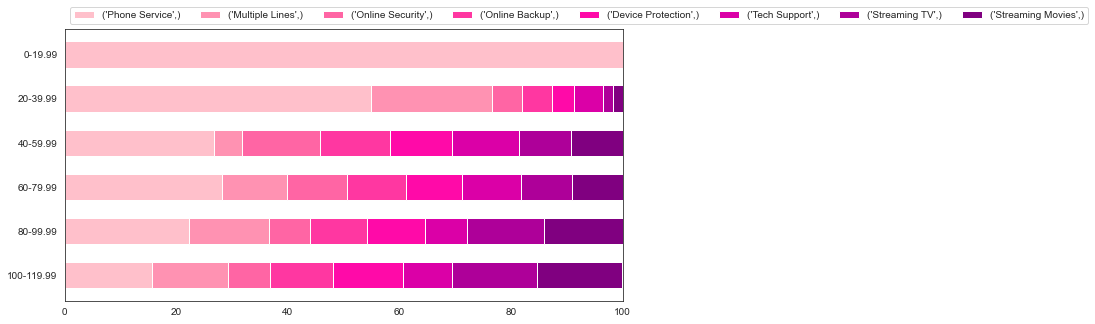

In [26]:
category_names2 = ['Phone Service',	'Multiple Lines',	'Online Security',	'Online Backup',
                   'Device Protection',	'Tech Support',	'Streaming TV',	'Streaming Movies']
results2 = {
    '0-19.99': [100.00,	0.00,	0.00,	0.00,	0.00,	0.00,	0.00,	0.00],
    '20-39.99': [54.99,	21.62,	5.44,	5.37,	3.92,	5.25,	1.64,	1.77],
    '40-59.99': [26.82,	4.98,	13.90,	12.63,	11.12,	12.07,	9.24,	9.24],
    '60-79.99': [28.24,	11.58,	10.76,	10.54,	10.18,	10.58,	8.98,	9.14],
    '80-99.99': [22.36,	14.35,	7.21,	10.33,	10.41,	7.42,	13.87,	14.06],
    '100-119.99': [15.73,	13.57,	7.55,	11.25,	12.49,	8.82,	15.29,	15.29],
}

sns.set_style(style='white')
colors = ["pink", "#ff92b2", "#ff65a4", "#ff37a1", "#ff0aa8", "#db00a7", "#ae0099", "purple"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(30,30),dpi=1000)

survey(results2, category_names2)
plt.savefig('services.png', bbox_inches = 'tight')
plt.show()


<Figure size 30000x30000 with 0 Axes>

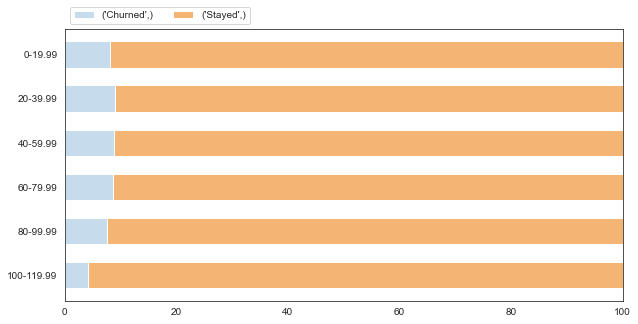

In [27]:
results3 = {
    '0-19.99': [8.12,	91.88],
    '20-39.99': [8.98,	91.02],
    '40-59.99': [8.87,	91.13],
    '60-79.99': [8.66,	91.34],
    '80-99.99': [7.64,	92.36],
    '100-119.99': [4.23, 95.77],
}

sns.set_style(style='white')
colors = ["#c6dcec", "#F4B474"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(30,30),dpi=1000)

survey(results3, category_names)
plt.savefig('churn.png', bbox_inches = 'tight')
plt.show()